<a href="https://colab.research.google.com/github/chandra-shikhar/ipp-assignment/blob/master/svm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import seaborn as sns
sns.set(context = 'paper', palette = 'winter_r', style = 'darkgrid', rc= {'figure.facecolor': 'gray',}, font_scale=1.5)

In [0]:
ls


sample_data/


In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
ls


drive/  sample_data/


In [0]:
cd drive

/content/drive


In [0]:
cd My Drive

/content/drive/My Drive


In [0]:
ls


 20180301_190532.mp4
 all.zip
'Chandra ShekharGupta_InternshalaResume.pdf'
'Colab Notebooks'/
 Contact/
 Digha/
'Digha beach'/
'Durga pooja'/
'Durgapur ghumaayi'/
 gender_submission.csv
'General presentation (1).gslides'
'General presentation.gslides'
 IMG_20171017_160739.jpg
 IMG_20171017_160849.jpg
 IMG_20171017_160850.jpg
 IMG_20171017_160852.jpg
 IMG_20171017_161341.jpg
 IMG_20171017_161343.jpg
 IMG_20171017_161401.jpg
 IMG_20171017_161404.jpg
 IMG_20171017_170706.jpg
 IMG_20171017_170717.jpg
 IMG_20180430_111445.jpg
 IMG_20180430_111450.jpg
 IMG_20180430_111504.jpg
 IMG_20180430_111506.jpg
 IMG_20180430_111535.jpg
 IMG_20180430_111538.jpg
 IMG_20180430_111559.jpg
 IMG_20180430_111602.jpg
 IMG_20180430_111643.jpg
 IMG_20180430_111650.jpg
 IMG_20180430_111651.jpg
 IMG_20180430_111654.jpg
 IMG_20180430_111657.jpg
 IMG_20180430_111722.jpg
 IMG_20180430_111734.jpg
 IMG_20180430_111805.jpg
 IMG_20180430_111807.jpg
 IMG_20180430_111821.jpg
 IMG_20180430_111823.jpg
 IMG_20180430_111835.jp

In [0]:
def Readcsv(data):
    return (pd.read_csv(data,index_col = 'PassengerId'))

traindf = Readcsv('train.csv')
testdf  = Readcsv('test.csv') 

In [0]:
traindf.columns, testdf.columns

(Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
        'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
        'Cabin', 'Embarked'],
       dtype='object'))

In [0]:
traindf.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [0]:
traindf.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

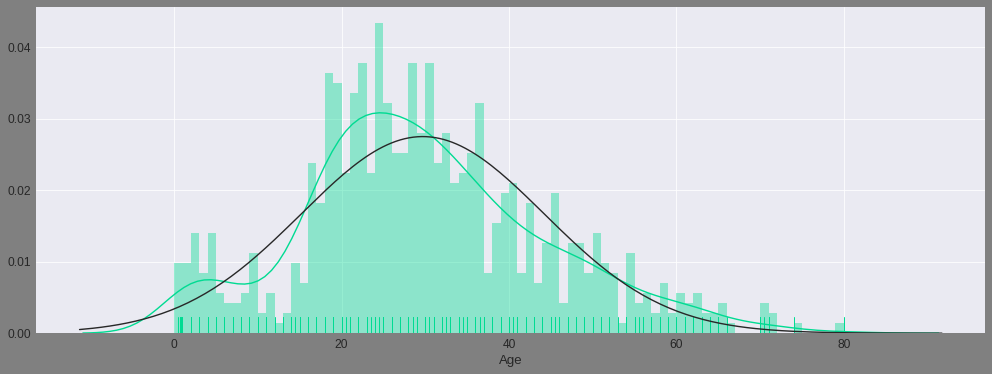

In [0]:
plt.figure(figsize = [17,6])
a = sns.distplot(traindf['Age'].dropna(),bins = range(0,81,1), rug = True, fit = norm)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


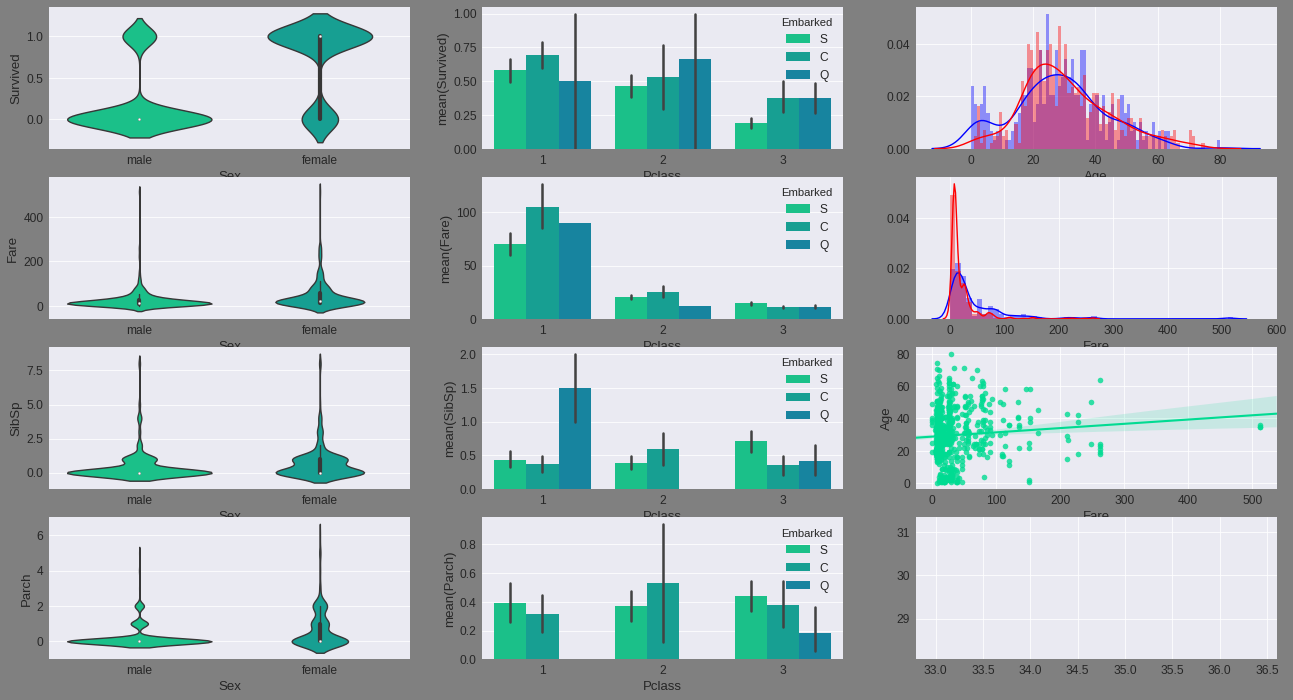

In [0]:
f, ax = plt.subplots(4, 3,figsize=[22,12])
#sns.set_palette('Set1', 8, .75)
#sns.set_style('whitegrid')
#plt.subplot(331)
sns.violinplot(x = 'Sex', y = 'Survived', data = traindf,ax = ax[0,0])
#sns.despine(offset=10, trim=True)
#plt.subplot(332)
sns.barplot(x = 'Pclass',y ='Survived',data = traindf,hue = 'Embarked',ax = ax[0,1])
#plt.subplot(333)
sns.distplot(traindf[traindf['Survived']==1]['Age'].dropna(),norm_hist = True,bins = np.arange(0,81,1),color = 'blue',
            ax = ax[0,2])
sns.distplot(traindf[traindf['Survived']==0]['Age'].dropna(),norm_hist = True,bins = np.arange(0,81,1), color = 'red',
            ax = ax[0,2])
#plt.subplot(334)
sns.violinplot(x = 'Sex', y = 'Fare', data = traindf,ax = ax[1,0])
#plt.subplot(335)
sns.barplot(x ='Pclass', y = 'Fare',data = traindf , hue = 'Embarked', ax = ax[1,1])
#plt.subplot(336)
sns.distplot(traindf[traindf['Survived']==1]['Fare'].dropna(),bins = np.arange(0,580,10),color = 'blue',
            ax = ax[1,2])
sns.distplot(traindf[traindf['Survived']==0]['Fare'].dropna(),bins = np.arange(0,580,10),color = 'red',
            ax = ax[1,2])

#plt.subplot(337)
sns.violinplot(x = 'Sex', y ='SibSp',data = traindf,ax = ax[2,0])
#plt.subplot(338)
sns.barplot(x= 'Pclass', y = 'SibSp', data = traindf, hue = 'Embarked', ax = ax[2,1])
#plt.subplot(339)
sns.regplot(x = 'Fare', y = 'Age', data = traindf, ax = ax[2,2])
#plt.subplot(341)
sns.violinplot(x = 'Sex', y = 'Parch', data = traindf, ax = ax[3,0])
#plt.subplot(342)
sns.barplot(x = 'Pclass', y = 'Parch', data = traindf, hue = 'Embarked', ax = ax[3,1])
plt.close(12)
plt.close(13)
plt.close(14)


In [0]:
traindf[traindf['Fare']>500]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


In [0]:
def get_isnull(train,test):
    return(train.isnull().sum(), test.isnull().sum())  

In [0]:
get_isnull(traindf,testdf)

(Survived      0
 Pclass        0
 Name          0
 Sex           0
 Age         177
 SibSp         0
 Parch         0
 Ticket        0
 Fare          0
 Cabin       687
 Embarked      2
 dtype: int64, Pclass        0
 Name          0
 Sex           0
 Age          86
 SibSp         0
 Parch         0
 Ticket        0
 Fare          1
 Cabin       327
 Embarked      0
 dtype: int64)

In [0]:
def combine(data1,data2):
    fulldf = pd.concat([data1,data2])
    return fulldf

In [0]:
def saperate(data):
    data1 = data.iloc[:len(traindf)]
    data2 = data.iloc[len(traindf):]
    return data1, data2

In [0]:
testdf[testdf['Fare'].isnull()]

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [0]:
def filling(data1,data2):
    data = combine(data1,data2)
    data['Embarked'] = data['Embarked'].fillna('C')
    data['Age']      = data['Age'].fillna(data['Age'].median())
    data['Fare']     = data['Fare'].fillna(data['Fare'].median())
    data['Cabin']    = data['Cabin'].fillna('Z')
    data['Cabin']    = data['Cabin'].apply(lambda x: str(x)[0])
    traindf, testdf    = saperate(data)
    return traindf, testdf
traindf, testdf = filling(traindf, testdf)
#testdf = filling(testdf)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


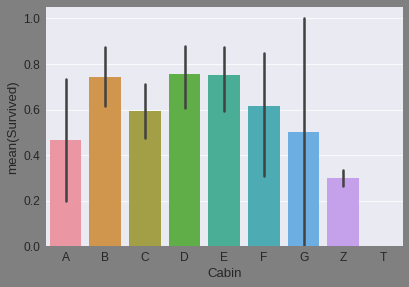

In [0]:
sns.barplot(x= 'Cabin', y = 'Survived', data = traindf ,order = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'Z', 'T'])

In [0]:
def pew(data1, data2):
    data = combine(data1,data2)
    data['Cabin'] = data['Cabin'].replace(['B', 'D', 'E'], 'H')   #High
    data['Cabin'] = data['Cabin'].replace(['F', 'C'], 'M')        #Medium
    data['Cabin'] = data['Cabin'].replace(['T', 'G', 'A',], 'L')  #Low
    data['Cabin'] = data['Cabin'].replace(['Z'],'X')              #Missing
    traindf, testdf    = saperate(data)
    return traindf, testdf
traindf, testdf = pew(traindf,testdf)
#testdf  = pew(testdf)

In [0]:
def family(data1, data2):
    data = combine(data1,data2)
    data['Family'] = data['SibSp'] + data['Parch'] + 1
    data['Alone']  = data['Family'].apply(lambda x: 1 if x == 1 else 0)
    data.drop(['SibSp','Parch'],axis = 1, inplace = True)
    traindf, testdf    = saperate(data)
    return traindf, testdf
traindf, testdf = family(traindf, testdf)
#testdf  = family(testdf)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


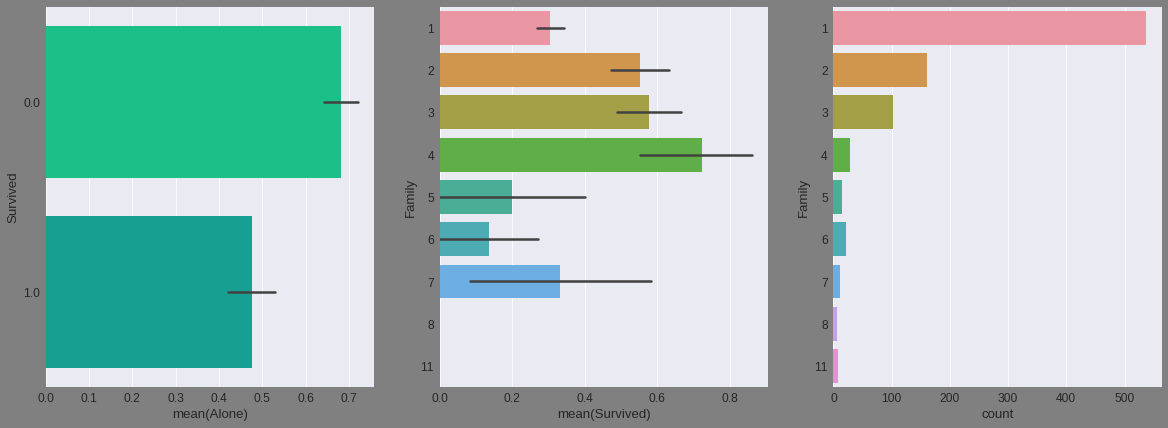

In [0]:
f,ax = plt.subplots(1,3,figsize=[20,7])
sns.barplot(x = 'Alone', y = 'Survived', data = traindf,orient = 'h', ax = ax[0])
sns.barplot(x = 'Survived', y = 'Family', data = traindf,orient = 'h', ax = ax[1])
sns.factorplot(y = 'Family',data = traindf, kind = 'count', orient = 'h', ax = ax[2])
plt.close(2)
plt.close(3)

In [0]:
traindf.head()

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Family,Alone
PassengerId,,,,,,,,,,,
1,22.0,X,S,7.2500,"Braund, Mr. Owen Harris",3,male,0.0,A/5 21171,2,0
2,38.0,M,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,1.0,PC 17599,2,0
3,26.0,X,S,7.9250,"Heikkinen, Miss. Laina",3,female,1.0,STON/O2. 3101282,1,1
4,35.0,M,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,1.0,113803,2,0
5,35.0,X,S,8.0500,"Allen, Mr. William Henry",3,male,0.0,373450,1,1


In [0]:
def FamilyGroup(data1, data2):
    data = combine(data1,data2)
    data.loc[data['Family'] > 2, 'FamilyGroup'] = 3
    data.loc[data['Family'] == 1, 'FamilyGroup'] = 1
    data.loc[data['Family'] == 2, 'FamilyGroup'] = 2
    traindf, testdf    = saperate(data)
    return traindf, testdf
traindf, testdf = FamilyGroup(traindf, testdf)
#testdf  = FamilyGroup(testdf) 

In [0]:
def mapping(data1, data2):
    data = combine(data1,data2)
    data['Embarked'] = data['Embarked'].map({'C':1, 'S':2, 'Q':3})
    data['Sex']      = data['Sex'].map({'male': 1,'female':0})
    data['CabinGroup'] = data['Cabin'].map({'H': 0, 'M': 1, 'L': 2, 'X':3})
    traindf, testdf    = saperate(data)
    return traindf, testdf
traindf, testdf = mapping(traindf, testdf)
#testdf  = mapping(testdf)

In [0]:
traindf['CabinGroup'].value_counts()

3    687
0    112
1     72
2     20
Name: CabinGroup, dtype: int64

In [0]:
traindf.head()

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Family,Alone,FamilyGroup,CabinGroup
PassengerId,,,,,,,,,,,,,
1,22.0,X,2,7.2500,"Braund, Mr. Owen Harris",3,1,0.0,A/5 21171,2,0,2.0,3
2,38.0,M,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,1.0,PC 17599,2,0,2.0,1
3,26.0,X,2,7.9250,"Heikkinen, Miss. Laina",3,0,1.0,STON/O2. 3101282,1,1,1.0,3
4,35.0,M,2,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,1.0,113803,2,0,2.0,1
5,35.0,X,2,8.0500,"Allen, Mr. William Henry",3,1,0.0,373450,1,1,1.0,3


In [0]:
def Titles(data1, data2):
    data = combine(data1,data2)
    data['Title'] = data['Name'].apply(lambda x: str(x).split(',')[1].split('.')[0])
    data['TitleGroup'] = 0
    data['TitleGroup'] = data['Title'].replace(['Mme','Ms','Lady','Sir','Mlle','the Countess',],0,          #High
                                            regex = True).replace(['Mrs','Miss','Master',],1,               #Medium
                                            regex = True).replace(['Dr','Major','Col','Mr'],2,              #Low
                                            regex = True).replace(['Don','Rev','Capt','Jonkheer','Dona'],4, #Least
                                            regex = True)
    #data['TitleGroup'] = data['TitleGroup'].replace({'male':1,'female':0,'Special':2})
    traindf, testdf    = saperate(data)
    return traindf, testdf
traindf, testdf = Titles(traindf, testdf)
#testdf  = Titles(testdf)
##['Mrs','Miss','Mme','Ms','Lady','Mlle','Countess','Dona'],'female'
##['Sir','Don','Rev','Mr',],'male'
##['Col','Dr','Col','Capt','Major','Jonkheer','Master'],'Special'

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


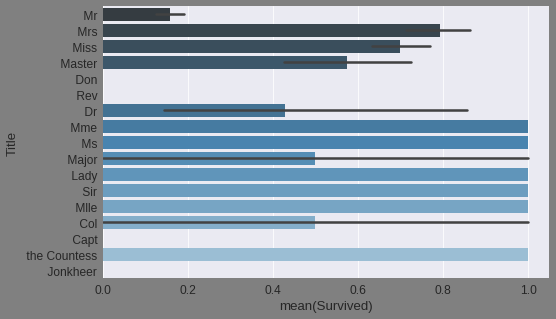

In [0]:
plt.figure(figsize = [8,5])
sns.barplot(x = 'Survived', y = 'Title', data = traindf, palette = 'Blues_d',)

In [0]:
def surname(data1, data2):
    data = combine(data1,data2)
    data['Surname'] = data['Name'].apply(lambda x: str(x).split(' ')[0].split(',')[0])
    Shares = 0
    Shares = data.groupby('Surname').apply(lambda x: x.shape[0])
    data['SharedSurname'] = data['Surname'].map(Shares)
    traindf, testdf    = saperate(data)
    return traindf, testdf

traindf, testdf = surname(traindf, testdf)

In [0]:
traindf.loc[traindf['Ticket'].str.contains('113803')]

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Family,Alone,FamilyGroup,CabinGroup,Title,TitleGroup,Surname,SharedSurname
PassengerId,,,,,,,,,,,,,,,,,
4,35.0,M,2,53.1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,1.0,113803,2,0,2.0,1,Mrs,1,Futrelle,2
138,37.0,M,2,53.1,"Futrelle, Mr. Jacques Heath",1,1,0.0,113803,2,0,2.0,1,Mr,2,Futrelle,2


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


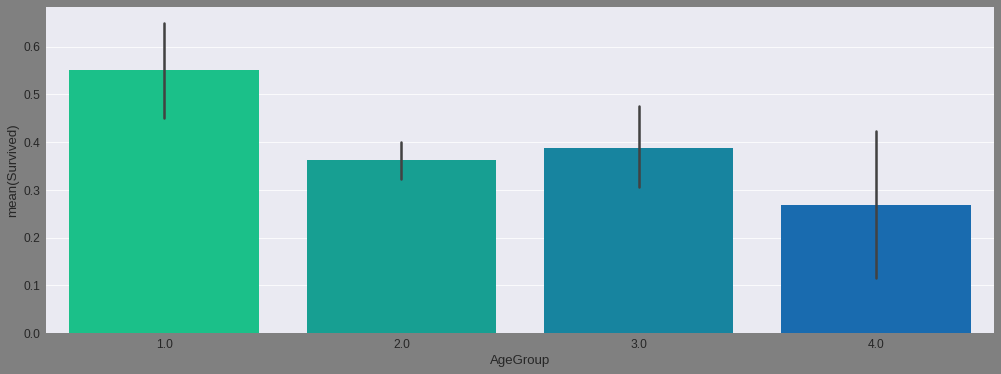

In [0]:
def age_distribution(data1, data2):
    data = combine(data1,data2)
    data.loc[data['Age']].round()
    data.loc[data['Age'] <= 16, 'AgeGroup'] = 1
    data.loc[(data['Age'] > 16) & (data['Age'] <= 40), 'AgeGroup'] = 2
    data.loc[(data['Age'] > 40) & (data['Age'] < 60), 'AgeGroup'] = 3
    data.loc[(data['Age'] >= 60), 'AgeGroup'] = 4
    #data['AgeGroup'].astype(int)
    traindf, testdf    = saperate(data)
    return traindf, testdf
traindf, testdf = age_distribution(traindf, testdf)
#testdf = age_distribution(testdf)
plt.figure(figsize = [17,6])
sns.barplot(x = traindf['AgeGroup'], y = traindf['Survived'])#data = traindf,)#ci = 95, orient = 'v')
plt.rc('xtick',labelsize = 12)


In [0]:
traindf.head(2)

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Family,Alone,FamilyGroup,CabinGroup,Title,TitleGroup,Surname,SharedSurname,AgeGroup
PassengerId,,,,,,,,,,,,,,,,,,
1,22.0,X,2,7.2500,"Braund, Mr. Owen Harris",3,1,0.0,A/5 21171,2,0,2.0,3,Mr,2,Braund,2,2.0
2,38.0,M,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,1.0,PC 17599,2,0,2.0,1,Mrs,1,Cumings,2,2.0


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


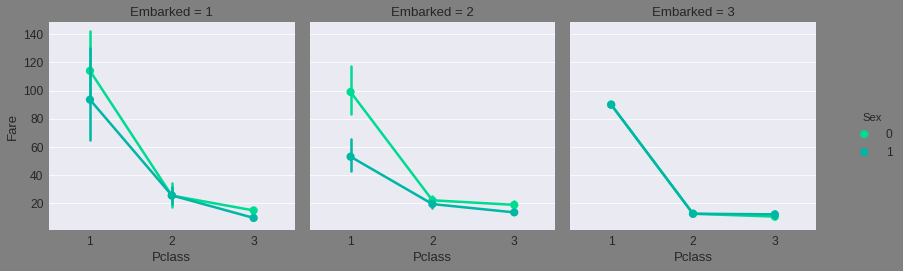

In [0]:
sns.factorplot(x = 'Pclass', y = 'Fare', col = 'Embarked', hue = 'Sex', data = traindf, margin_titles = True)

In [0]:
def SharedSurname(data1, data2):
    data = combine(data1,data2)
    Shares = 0
    Shares = data.groupby('Surname').apply(lambda x: x.shape[0])
    data['SharedSurname'] = data['Surname'].map(Shares)
    traindf, testdf    = saperate(data)
    return traindf, testdf
traindf, testdf = SharedSurname(traindf, testdf)
#testdf  = SharedSurname(testdf)

In [0]:
testdf.head(3)

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Family,Alone,FamilyGroup,CabinGroup,Title,TitleGroup,Surname,SharedSurname,AgeGroup
PassengerId,,,,,,,,,,,,,,,,,,
892,34.5,X,3,7.8292,"Kelly, Mr. James",3,1,NaN,330911,1,1,1.0,3,Mr,2,Kelly,5,2.0
893,47.0,X,2,7.0000,"Wilkes, Mrs. James (Ellen Needs)",3,0,NaN,363272,2,0,2.0,3,Mrs,1,Wilkes,1,3.0
894,62.0,X,3,9.6875,"Myles, Mr. Thomas Francis",2,1,NaN,240276,1,1,1.0,3,Mr,2,Myles,1,4.0


In [0]:
def fare_distribution(data1, data2):
    data = combine(data1,data2)
    payment = data.groupby('Pclass')['Fare'].mean()
    data.loc[(data['Fare'] < payment[3]),'FareGroup'] = 1
    data.loc[(data['Fare'] > payment[3]) & (data['Fare'] <  payment[2]),'FareGroup'] = 2
    data.loc[(data['Fare'] > payment[2]) & (data['Fare'] <  payment[1]), 'FareGroup'] = 3
    data.loc[(data['Fare'] > payment[1]),'FareGroup'] = 4
    #data['Fare'] = data['Fare'].map({'Very Low': 0, 'Low': 1, 'Medium':2, 'High':3})
    data['FareGroup'] = data['FareGroup'].astype(int)
    traindf, testdf    = saperate(data)
    return traindf, testdf
#payment = fulldf.groupby('Pclass')['Fare'].mean()
traindf, testdf = fare_distribution(traindf, testdf)
#testdf = fare_distribution(testdf)

In [0]:
#pd.get_dummies(traindf,columns = (['Pclass','Sex','Age','Fare','Embarked','Family','Alone','Title']), drop_first = True)

In [0]:
def Tickets(data1, data2):
    data = combine(data1,data2)
    #Creating a new column to display the freq of the tickets present
    data['SharedTicketCount'] = data.groupby('Ticket')[['Fare']].transform('count').astype(int)
    #Removing any characters other than alphabets and numbers to count the ticket length
    data['Ticket'] = data['Ticket'].str.replace('.','').str.replace('/','').str.replace(' ','')
    data['TicketLength'] = data['Ticket'].apply(lambda x: len(str(x)))
    traindf, testdf    = saperate(data)
    return traindf, testdf
traindf, testdf = Tickets(traindf, testdf)
#testdf = Tickets(testdf)

In [0]:
traindf.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Pclass', 'Sex', 'Survived',
       'Ticket', 'Family', 'Alone', 'FamilyGroup', 'CabinGroup', 'Title',
       'TitleGroup', 'Surname', 'SharedSurname', 'AgeGroup', 'FareGroup',
       'SharedTicketCount', 'TicketLength'],
      dtype='object')

In [0]:
traindf.head()

,Age,Cabin,Embarked,Fare,Name,Pclass,Sex,Survived,Ticket,Family,...,FamilyGroup,CabinGroup,Title,TitleGroup,Surname,SharedSurname,AgeGroup,FareGroup,SharedTicketCount,TicketLength
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,22.0,X,2,7.2500,"Braund, Mr. Owen Harris",3,1,0.0,A521171,2,...,2.0,3,Mr,2,Braund,2,2.0,1,1,7
2,38.0,M,1,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,1.0,PC17599,2,...,2.0,1,Mrs,1,Cumings,2,2.0,3,2,7
3,26.0,X,2,7.9250,"Heikkinen, Miss. Laina",3,0,1.0,STONO23101282,1,...,1.0,3,Miss,1,Heikkinen,1,2.0,1,1,13
4,35.0,M,2,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,1.0,113803,2,...,2.0,1,Mrs,1,Futrelle,2,2.0,3,2,6
5,35.0,X,2,8.0500,"Allen, Mr. William Henry",3,1,0.0,373450,1,...,1.0,3,Mr,2,Allen,2,2.0,1,1,6


In [0]:
X = traindf.drop(['Name','Title','Surname','Survived','Cabin','Ticket',
                  'Age','Fare','Family','Alone'],axis = 1)
y = traindf['Survived']
X.shape , y.shape

((891, 11), (891,))

In [0]:
X.columns

Index(['Embarked', 'Pclass', 'Sex', 'FamilyGroup', 'CabinGroup', 'TitleGroup',
       'SharedSurname', 'AgeGroup', 'FareGroup', 'SharedTicketCount',
       'TicketLength'],
      dtype='object')

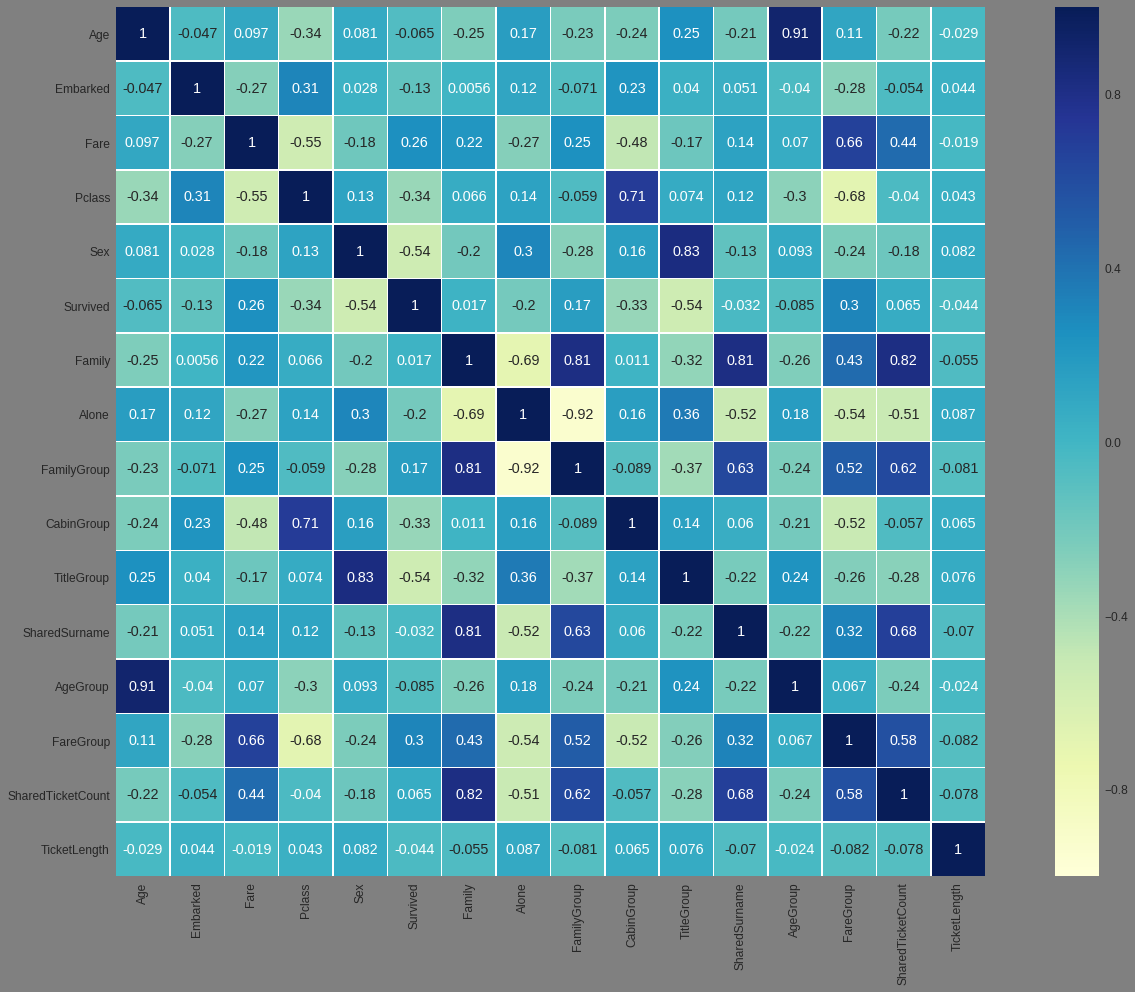

In [0]:
f, ax = plt.subplots(figsize = [25,16])
sns.heatmap(traindf.corr(),linewidths = .5, annot = True, cmap = 'YlGnBu', square = True)

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, plot_importance

In [0]:
X.columns

Index(['Embarked', 'Pclass', 'Sex', 'FamilyGroup', 'CabinGroup', 'TitleGroup',
       'SharedSurname', 'AgeGroup', 'FareGroup', 'SharedTicketCount',
       'TicketLength'],
      dtype='object')

In [0]:
npX = np.array(X).copy()
npy = np.array(y).copy()

In [0]:

clf_svm = SVC()

In [0]:
Classifiers = ['SVM']
scores = []
models = [clf_svm]
for model in models:
    score = cross_val_score(model, npX, npy, scoring = 'accuracy', cv = 10, n_jobs = -1).mean()
    scores.append(score)

In [0]:
mode = pd.DataFrame(scores, index = Classifiers, columns = ['score']).sort_values(by = 'score',
             ascending = False)

In [0]:
mode


,score
SVM,0.831657


In [0]:
from sklearn.metrics import classification_report

In [0]:
parameters_svm = {'C':[0.9,0.01],'kernel':['rbf','linear'], 'gamma':[0,0.1,'auto'], 'probability':[True,False],
                  'random_state':[0,7,16],'decision_function_shape':['ovo','ovr'],'degree':[3,4,10]}

In [0]:
def grid(model,parameters):
    grid = GridSearchCV(estimator = model, param_grid = parameters, cv = 10, 
                        scoring = 'accuracy')
    grid.fit(npX,npy)
    return grid.best_score_, grid.best_estimator_.get_params()

In [0]:
def imp_features(model, model_name, params):
    Model = model(**params)
    Model.fit(npX,npy)
    names = X.columns
    feature = Model.feature_importances_
    important_features = pd.Series(data = feature, index = names,)
    important_features = important_features.sort_values(ascending = True)
    return important_features.plot(kind = 'barh', grid = False,title = model_name)

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
x = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = .2)
X_train_reduced = PCA(n_components = 2).fit_transform(X_train)
X_test_reduced  = PCA(n_components=  2).fit_transform(X_test)

In [0]:
def boundaries(model, heading, best_params):
    Model = model(**best_params)
    Model.fit(X_train_reduced, y_train)

    X_set, y_set = np.concatenate([X_train_reduced, X_test_reduced], axis = 0), np.concatenate([y_train, y_test], axis = 0)
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                             np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

    #plt.figure(figsize = [15,16])
    plt.contourf(X1, X2, Model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                     alpha = 0.5, cmap = ListedColormap(('k', 'blue')))
    
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())

    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
    plt.xticks(fontsize = 3)
    plt.yticks(fontsize = 3)

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier, plot_importance 

In [0]:
X.columns

Index(['Embarked', 'Pclass', 'Sex', 'FamilyGroup', 'CabinGroup', 'TitleGroup',
       'SharedSurname', 'AgeGroup', 'FareGroup', 'SharedTicketCount',
       'TicketLength'],
      dtype='object')

In [0]:
npX = np.array(X).copy()
npy = np.array(y).copy()

In [0]:
clf_rf = RandomForestClassifier()
clf_et = ExtraTreesClassifier()
clf_bc = BaggingClassifier()
clf_ada = AdaBoostClassifier()
clf_dt = DecisionTreeClassifier()
clf_xg = XGBClassifier()
clf_lr = LogisticRegression()
clf_svm = SVC()

In [0]:
Classifiers = ['SVM']
scores = []
models = [clf_svm]
for model in models:
    score = cross_val_score(model, npX, npy, scoring = 'accuracy', cv = 10, n_jobs = -1).mean()
    scores.append(score)

In [0]:
mode = pd.DataFrame(scores, index = Classifiers, columns = ['score']).sort_values(by = 'score',
             ascending = False)

In [0]:
mode

,score
SVM,0.831657


In [0]:
parameters_xg = {'max_depth':[3,6,7], 'learning_rate': [0.1,0.2], 'n_estimators': [300,200], 
                 'min_child_weight': [4], 'reg_alpha': [6,0], 'reg_lambda': [1,8],'max_delta_step':[2],
                 'gamma':[0],'seed':[1]}

parameters_svm = {'C':[0.9,0.01],'kernel':['rbf','linear'], 'gamma':[0,0.1,'auto'], 'probability':[True,False],
                  'random_state':[0,7,16],'decision_function_shape':['ovo','ovr'],'degree':[3,4,10]}

parameters_rf = {'n_estimators': [100,50], 'max_features': [7,'auto',None],
                 'n_jobs': [-1], 'min_samples_leaf': [2,4,], 'random_state':[1,7,], 
                 'min_samples_split':[2,6,], 'oob_score': [True,False],
                 'criterion': ['gini'], 'warm_start': [True,False]}

In [0]:
def grid(model,parameters):
    grid = GridSearchCV(estimator = model, param_grid = parameters, cv = 10, 
                        scoring = 'accuracy')
    grid.fit(npX,npy)
    return grid.best_score_, grid.best_estimator_.get_params()

In [0]:
def imp_features(model, model_name, params):
    Model = model(**params)
    Model.fit(npX,npy)
    names = X.columns
    feature = Model.feature_importances_
    important_features = pd.Series(data = feature, index = names,)
    important_features = important_features.sort_values(ascending = True)
    return important_features.plot(kind = 'barh', grid = False,title = model_name)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this wi

0.8428731762065096


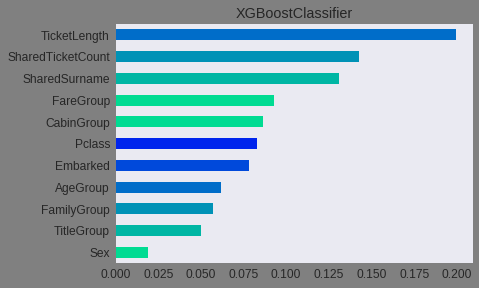

In [0]:
best_score_xg, best_params_xg = grid(clf_xg,parameters_xg)
print(best_score_xg)
imp_features(XGBClassifier, 'XGBoostClassifier', best_params_xg)

In [0]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X_train_reduced, y_train) 
y_pred = clf.predict(X_test_reduced)

from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

        0.0       0.75      0.90      0.82       112
        1.0       0.76      0.51      0.61        67

avg / total       0.75      0.75      0.74       179

